In [2]:
#讀取檔案 stops.txt，該檔案包含以換行符分隔的文本行，
#代表某些停用詞（在自然語言處理中通常被忽略的常見詞彙）

# 程式使用 with 陳述式打開檔案，並以指定的 'utf8' 編碼讀取其內容，
# 將每行文本分割成一個列表 stops。
with open('data/stops.txt', 'r', encoding='utf8') as f:
    stops = f.read().split('\n')
stops.append('\n')

#程式計算每個分批處理的詞彙數量，分批顯示停用詞列表
count = 15
num = len(stops)//count

#每部分包含num個詞彙。最後程式以 , 連接每部分的詞彙，並將它們列印出來。
for i in range(num):
    print(", ".join(stops[i*num : (i+1)*num]))

﻿\n, \n\n, ﻿,, , 、, 。, “, ”, 《, 》, ！, ，, ：, ；, ？, 人民, 末##末, 啊, 阿, 哎, 哎呀, 哎喲, 唉, 我, 我們, 按, 按照, 依照, 吧, 吧噠, 把, 罷了, 被, 本, 本著, 比, 比方, 比如, 鄙人, 彼, 彼此, 邊, 別, 別的, 別說, 並, 並且, 不比, 不成, 不單, 不但, 不獨, 不管, 不光, 不過, 不僅, 不拘, 不論, 不怕, 不然, 不如, 不特, 不惟, 不問, 不只, 朝, 朝著, 趁, 趁著, 乘, 沖, 除, 除此之外, 除非, 除了, 此, 此間, 此外, 從, 從而, 打
待, 但, 但是, 當, 當著, 到, 得, 的, 的話, 等, 等等, 地, 第, 叮咚, 對, 對於, 多, 多少, 而, 而況, 而且, 而是, 而外, 而言, 而已, 爾後, 反過來, 反過來說, 反之, 非但, 非徒, 否則, 嘎, 嘎登, 該, 趕, 個, 各, 各個, 各位, 各種, 各自, 給, 根據, 跟, 故, 故此, 固然, 關於, 管, 歸, 果然, 果真, 過, 哈, 哈哈, 呵, 和, 何, 何處, 何況, 何時, 嘿, 哼, 哼唷, 呼哧, 乎, 嘩, 還是, 還有, 換句話說, 換言之, 或, 或是, 或者, 極了, 及, 及其, 及至, 即, 即便
即或, 即令, 即若, 即使, 幾, 幾時, 己, 既, 既然, 既是, 繼而, 加之, 假如, 假若, 假使, 鑒於, 將, 較, 較之, 叫, 接著, 結果, 借, 緊接著, 進而, 盡, 儘管, 經, 經過, 就, 就是, 就是說, 據, 具體地說, 具體說來, 開始, 開外, 靠, 咳, 可, 可見, 可是, 可以, 況且, 啦, 來, 來著, 離, 例如, 哩, 連, 連同, 兩者, 了, 臨, 另, 另外, 另一方面, 論, 嘛, 嗎, 慢說, 漫說, 冒, 麼, 每, 每當, 們, 莫若, 某, 某個, 某些, 拿, 哪, 哪邊, 哪兒, 哪個, 哪裏, 哪年, 哪怕, 哪天
哪些, 哪樣, 那, 那邊, 那兒, 那個, 那會兒, 那裏, 那麼, 那麼些, 那麼樣, 那時, 那些, 那樣, 乃, 乃至, 呢, 能, 你, 你們, 您, 寧, 寧可, 寧肯, 寧願, 哦, 嘔, 啪達, 旁人, 呸,

In [7]:
#斷詞分析(檢查停用詞)+視覺化繪製文字雲
#我爬蟲聯合報網站文章標題，來做斷詞分析 看目前什麼關鍵字熱門 做成時下的文字雲

import requests
from bs4 import BeautifulSoup

web = requests.get('https://udn.com/news/breaknews/1') 
web.encoding='utf-8'      

soup = BeautifulSoup(web.text, "html.parser")

containers = soup.find_all(class_='story-list__text')

# 儲存爬取的 title
titles = []

for container in containers:
    # 查找容器中的所有 <h2> 標籤
    h2_tags = container.find_all('h2')
    for h2 in h2_tags:
        # 查找 <h2> 標籤下的所有 <a> 標籤
        a_tags = h2.find_all('a')
        for a in a_tags:
            # 提取 <a> 標籤中的 title 屬性
            title = a.get('title')
            if title:
                print(title)
                titles.append(title)

不願承諾保台？分析：回歸對台戰略模糊 不符合美國新政府利益
星宇航空上市案過關 有望今年第4季掛牌
8/16來追星！蔣萬安宣布香堤廣場將辦奧運英雄時尚派對
金價太高不買了？陸央行連續三個月暫停增持黃金
BTS SUGA酒後不是騎電動滑板車？韓媒曝警方說法 若屬實刑責恐加重
排球／福誠破豐商不敗之身 助內工奪登峰造極賽冠軍
香港茶餐廳有隱形小費？小紅書女談4大潛規則 網友：所以都去深圳了
奧運桌球／中華女團8強迎戰大魔王 首點雙打遭直落三
洗衣飄霉味...她清洗衣機嚇傻全是髒汙 網激推2招秒乾淨
敦促大陸別脅迫太平洋島國 澳洲指援助須透明化：想要一個和平穩定的區域
美國晶片股慘跌後可買了嗎？分析師直指輝達和「這1檔」：浮現誘人買點
錯誤決策不只一樁？路透曝英特爾「曾拒入股OpenAI」 慘錯失AI商機
未發「末日警語」！羅比尼指市場過度悲觀：美國經濟並無朝向硬著陸跡象
中職／6局11K！徐若熙終結兄弟3連勝 龍紛擾中守護主場
台股7月上沖下洗 定期定額買股金額攀升至157.9億元新高
奧運羽球／熱情球迷從早到晚守家門 王齊麟：請給一些私人空間
奧運籃球／澳洲女籃85比67擊敗塞爾維亞  晉級4強
人間蒸發？彰化役男47年前不假離營 家人聲請死亡宣告獲准
巴奧台灣館登上法國第二大報 「台灣與世界一起玩耍」
高科積含量ETF反彈力道強於大盤 9檔漲幅均在7.6%以上


In [10]:
#首先，使用 jieba.cut 函式將變數 testStr（待處理的文本）進行分詞，並設置 cut_all=True，這將使用全模式進行分詞，生成一個詞彙列表。然後，透過列表解析過濾掉在 stops（停用詞列表）中出現的詞彙，得到一個 terms 列表。
#使用 sorted 函式對一個詞彙計數字典（或稱為 Counter 對象）的項目進行排序。Counter(terms).items() 會將計算字典的項目轉換成一個dict_items資料型態儲存，其中每個項目都是一個詞彙及其對應的計數。key=lambda x:x[1] 指定了排序的鍵，即按照每個項目的第二個元素（即詞彙的計數）進行排序。reverse=True 則表示進行降序排列，即從最大的計數開始排列。
import jieba

from collections import Counter
import re


# 將爬取到的 title 合併成一個字符串
text_str = ' '.join(titles)

# 過濾掉數字、英文字母和特殊字符（包括「/」）
def is_valid_term(term):
    # 返回是否為有效詞條（非空白，且不包含數字、英文字母和「/」）
    return bool(term.strip()) and not re.search(r'[a-zA-Z0-9/]', term)

filtered_terms = [t for t in jieba.cut(text_str, cut_all=True) if is_valid_term(t) and t not in stops]

# 計算詞頻
term_counts = Counter(filtered_terms)

# 輸出字詞頻率由大至小排序
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# 打印結果
for term, count in sorted_terms:
    print(f"{term}: {count}")

台: 5
國: 5
奧: 5
／: 5
運: 4
買: 4
美: 3
場: 3
陸: 3
女: 3
中: 3
強: 3
分析: 2
戰: 2
金: 2
高: 2
月: 2
後: 2
曝: 2
法: 2
商: 2
敗: 2
小: 2
網: 2
點: 2
洗衣: 2
機: 2
澳洲: 2
指: 2
股: 2
慘: 2
檔: 2
人: 2
錯: 2
爾: 2
發: 2
守: 2
額: 2
請: 2
間: 2
籃: 2
灣: 2
願: 1
承: 1
諾: 1
保: 1
回: 1
模糊: 1
不符: 1
符合: 1
新政: 1
新政府: 1
政府: 1
利益: 1
星: 1
宇航: 1
航空: 1
空上: 1
上市: 1
案: 1
關: 1
有望: 1
今年: 1
季: 1
掛: 1
牌: 1
追星: 1
蔣: 1
萬: 1
安: 1
宣布: 1
香: 1
堤: 1
廣: 1
辦: 1
英雄: 1
時: 1
尚: 1
派: 1
價: 1
太: 1
央行: 1
續: 1
暫: 1
停: 1
增: 1
持: 1
黃: 1
酒: 1
騎: 1
電: 1
動: 1
滑板: 1
車: 1
韓: 1
媒: 1
警方: 1
說: 1
屬: 1
實: 1
刑: 1
責: 1
恐: 1
加重: 1
排球: 1
福: 1
誠: 1
破: 1
豐: 1
之身: 1
助: 1
工: 1
奪: 1
登峰: 1
造: 1
賽: 1
冠: 1
軍: 1
香港: 1
茶: 1
餐: 1
廳: 1
隱: 1
形: 1
費: 1
紅: 1
書: 1
談: 1
潛: 1
規: 1
友: 1
深圳: 1
桌球: 1
華: 1
團: 1
迎: 1
魔王: 1
首: 1
雙: 1
遭: 1
直落: 1
飄: 1
霉味: 1
清洗: 1
傻: 1
全: 1
髒: 1
汙: 1
激: 1
推: 1
招: 1
秒: 1
乾: 1
淨: 1
敦促: 1
脅: 1
迫: 1
太平: 1
太平洋: 1
島: 1
援助: 1
須: 1
透明: 1
透明化: 1
想要: 1
和平: 1
穩: 1
區: 1
域: 1
晶片: 1
跌: 1
師: 1
直指: 1
輝: 1
達: 1
」：: 1
浮: 1
現: 1
誘: 1
誤: 1
決: 1
策: 1
只: 1
樁: 1
路透: 1
英特: 1
曾: 1
拒: 1
入股: 1
失: 1


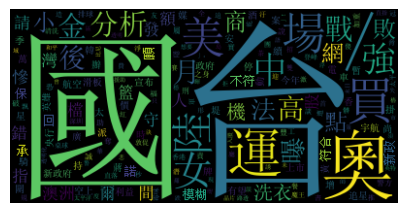

In [12]:
#生成文字雲
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wordcloud = WordCloud(font_path="data/simsun.ttf")
wordcloud.generate_from_frequencies(frequencies=Counter(filtered_terms))
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

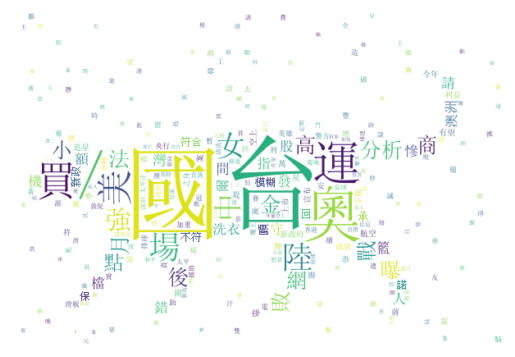

In [15]:
#客製化文字雲 用貓圖

import numpy as np 
from PIL import Image

alice_mask = np.array(Image.open("data/cat.png"))
wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask, font_path="data/simsun.ttf",prefer_horizontal=0.8)
wc.generate_from_frequencies(Counter(filtered_terms))

# store to file
wc.to_file(r"cat2.png")

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')